
## DESCRIPCIÓN DE LAS COLUMNAS 

*step*: asigna una unidad de tiempo en el mundo real. En este caso, 1 paso equivale a 1 hora de tiempo.
Total de pasos: 744 (simulación de 30 días).

*type*: CASH-IN, CASH-OUT, DEBIT, PAYMENT y TRANSFER.

*mount*:monto de la transacción en moneda local.

*nameOrig*: cliente que inició la transacción

*oldbalanceOrg*: saldo inicial antes de la transacción

*newbalanceOrig*: nuevo saldo después de la transacción.

*nameDest*: cliente que es el destinatario de la transacción

*oldbalanceDest*: destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para
los clientes que comienzan con M (comerciantes).

*newbalanceDest*: nuevo destinatario del saldo después de la transacción. Tenga en cuenta que no hay información para 
los clientes que comienzan con M (comerciantes).

*isFraud*: se trata de las transacciones realizadas por los agentes fraudulentos dentro de la simulación.
En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener 
ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra 
cuenta y luego sacándolos del sistema.

*isFlaggedFraud*: el modelo comercial tiene como objetivo controlar las transferencias masivas de una cuenta a otra y
marcar los intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en
una sola transacción.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix,f1_score

In [2]:
data=pd.read_csv('dataset.csv')

data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.duplicated().any()

False

In [5]:
data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

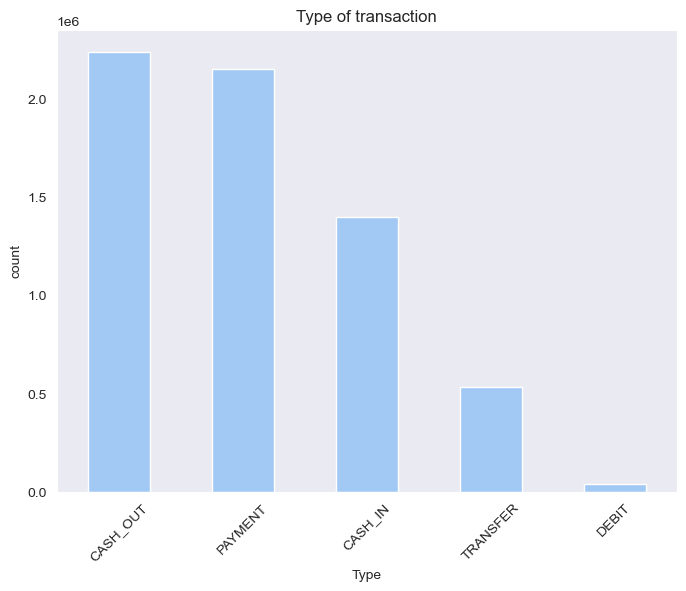

In [6]:
sns.set_style("dark")
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
data['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction')
plt.xticks(rotation = 45)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

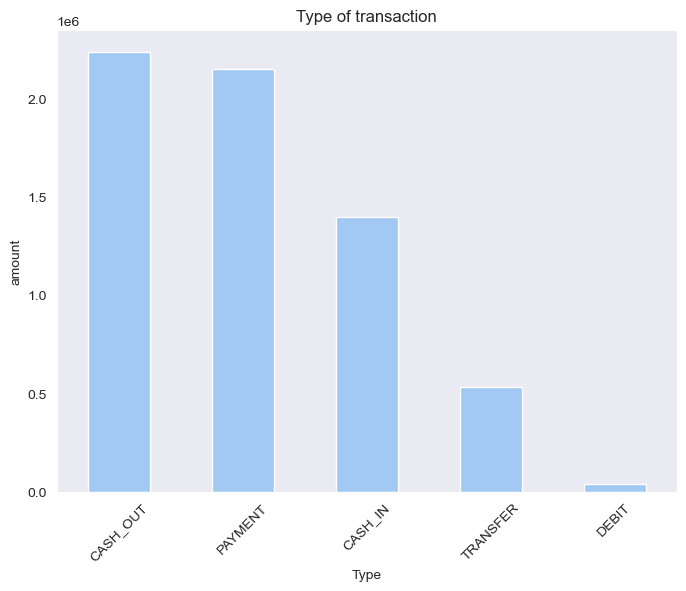

In [7]:
sns.set_style("dark")
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
data['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction')
plt.xticks(rotation = 45)
plt.xlabel('Type')
plt.ylabel('amount')
plt.show()

In [8]:
fraud_counts = data['isFraud'].value_counts()

total = len(data)


percent_0 = (fraud_counts.get(0, 0) / total) * 100
percent_1 = (fraud_counts.get(1, 0) / total) * 100

# Mostrar los resultados
print(f"Valores 0: {fraud_counts.get(0, 0)} ({percent_0:.2f}%)")
print(f"Valores 1: {fraud_counts.get(1, 0)} ({percent_1:.2f}%)")

Valores 0: 6354407 (99.87%)
Valores 1: 8213 (0.13%)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

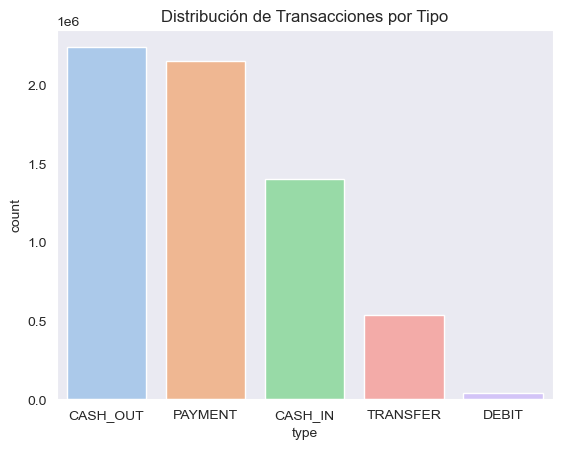

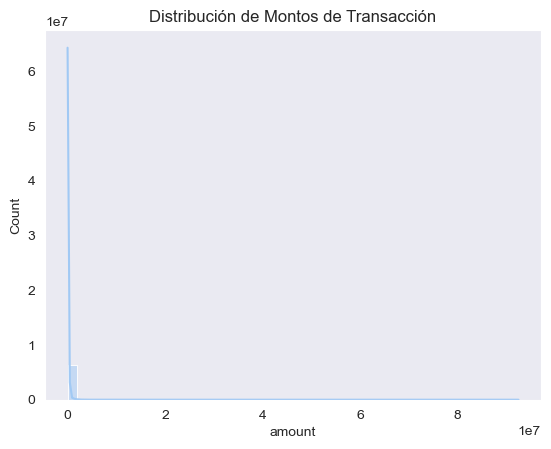

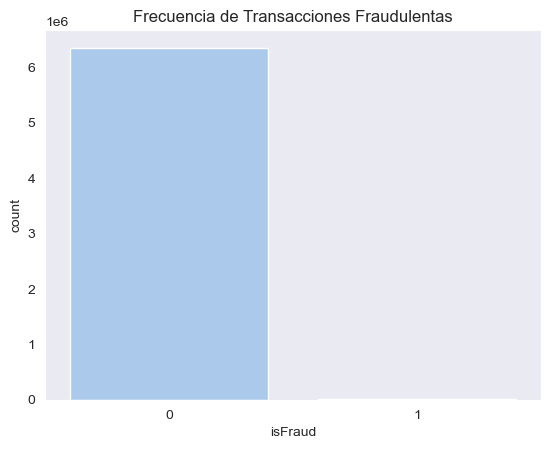

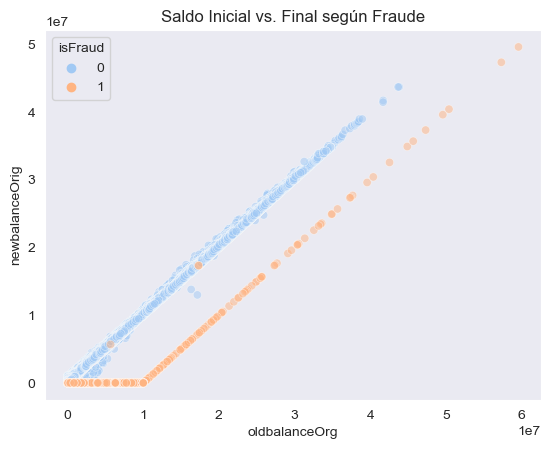

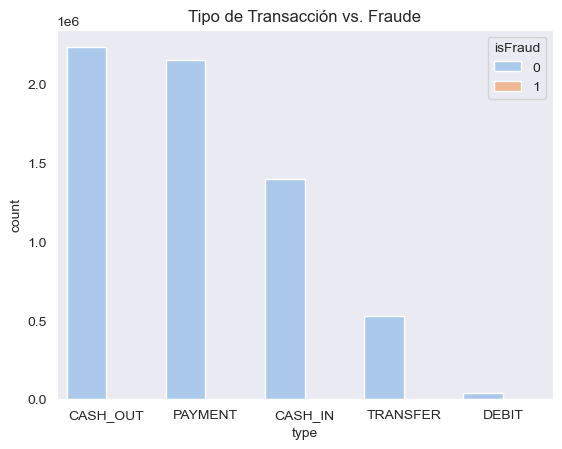

In [9]:

# Exploración inicial
print(data.info())  # Información general del dataset
print(data.describe())  # Resumen estadístico de las columnas numéricas

# Distribución de transacciones por tipo
sns.countplot(data=data, x='type', order=data['type'].value_counts().index)
plt.title('Distribución de Transacciones por Tipo')
plt.show()

# Distribución de montos de transacción
sns.histplot(data=data, x='amount', bins=50, kde=True)
plt.title('Distribución de Montos de Transacción')
plt.show()

# Frecuencia de transacciones fraudulentas
sns.countplot(data=data, x='isFraud')
plt.title('Frecuencia de Transacciones Fraudulentas')
plt.show()

# Relación entre saldo inicial y final por fraude
sns.scatterplot(data=data, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', alpha=0.5)
plt.title('Saldo Inicial vs. Final según Fraude')
plt.show()

# Relación entre tipo de transacción y fraude
sns.countplot(data=data, x='type', hue='isFraud', order=data['type'].value_counts().index)
plt.title('Tipo de Transacción vs. Fraude')
plt.show()


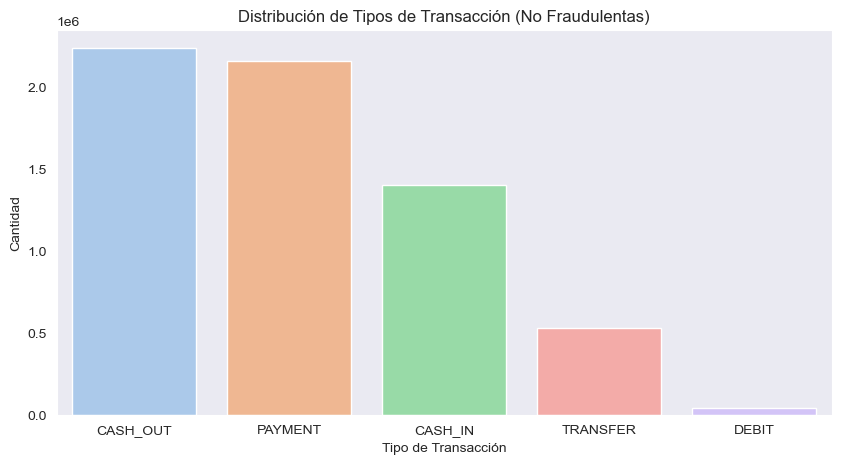

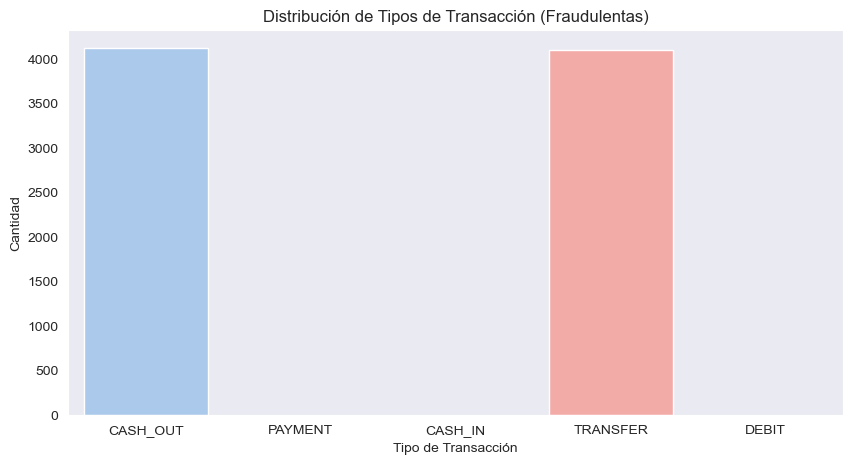

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar transacciones no fraudulentas (isFraud=0)
data_no_fraud = data[data['isFraud'] == 0]

# Filtrar transacciones fraudulentas (isFraud=1)
data_fraud = data[data['isFraud'] == 1]

# Crear el gráfico para transacciones no fraudulentas
plt.figure(figsize=(10, 5))
sns.countplot(data=data_no_fraud, x='type', order=data['type'].value_counts().index)
plt.title('Distribución de Tipos de Transacción (No Fraudulentas)')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Cantidad')
plt.show()

# Crear el gráfico para transacciones fraudulentas
plt.figure(figsize=(10, 5))
sns.countplot(data=data_fraud, x='type', order=data['type'].value_counts().index)
plt.title('Distribución de Tipos de Transacción (Fraudulentas)')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Cantidad')
plt.show()


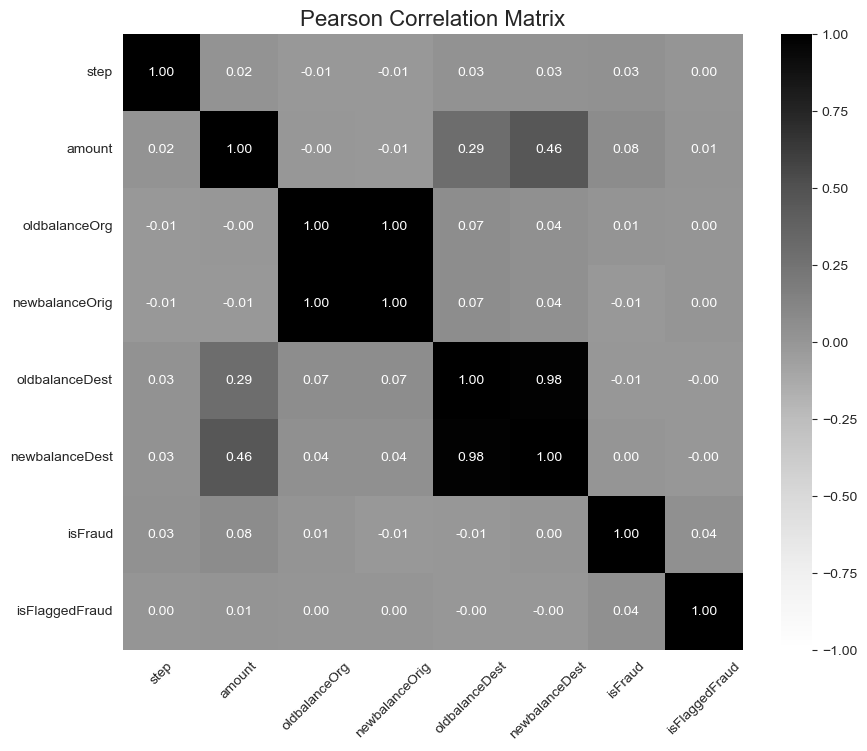

In [11]:

# selecting the columns of numerical type
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_data = data[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [5]:
# Elegir solo columnas específicas para convertir a dummies
columns_to_encode = ['type']  # Ajusta con las columnas relevantes

# Convertir solo las columnas seleccionadas a variables dummy
data_with_dummies = pd.get_dummies(data, columns=columns_to_encode, drop_first=False)
data_with_dummies






NameError: name 'pd' is not defined

In [13]:
X = data_with_dummies.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = data_with_dummies['isFraud']



In [28]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Paso 3: Construcción del Modelo



### Selecciona un algoritmo inicial:
#### Usa Logistic Regression o Random Forest como punto de partida.

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
# make an object of logistic regression
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42)
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Logistic Regression===========

 Accuaracy: 0.9983128019589415

 Precision: 0.35916622127204706

 Recall: 0.4148148148148148

 F1 Score: 0.3849899742194214

==========Decision Tree Classifier===========

 Accuaracy: 0.9997163118338043

 Precision: 0.8996825396825396

 Recall: 0.8746913580246913

 F1 Score: 0.8870109546165884

==========Random Forest===========

 Accuaracy: 0.9997304569501243

 Precision: 0.9833459500378501

 Recall: 0.8018518518518518

 F1 Score: 0.8833730023801428


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
classifier["Gradient Boosting"] = GradientBoostingClassifier()


In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

DecisionTreeClassifier()

In [23]:
import joblib


In [24]:
joblib.dump(dtc, "modelo_detecfraude.pkl")

['modelo_detecfraude.pkl']

In [29]:
model = joblib.load("modelo_detecfraude.pkl")


In [33]:
pred = model.predict([[743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1]])

pred[0]

C:\Users\cande\Documents\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [19]:
classifier = {
    "Gradient Boosting" :GradientBoostingClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


==========Gradient Boosting===========


KeyboardInterrupt: 

In [34]:
data2=pd.read_csv('dataset.csv')

data2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [39]:
import pandas as pd

# Leer el archivo dataset
dataset = pd.read_csv('dataset.csv')

# 1. Seleccionar 5000 filas aleatorias
data_sampled = dataset.sample(n=5000, random_state=42)  # random_state asegura resultados reproducibles

# 2. Eliminar las columnas 'isFlaggedFraud', 'nameOrig', 'nameDest'
data2 = data_sampled.drop(columns=['isFraud','isFlaggedFraud', 'nameOrig', 'nameDest'])


data2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3737323,278,CASH_IN,330218.42,20866.00,351084.42,452419.57,122201.15
264914,15,PAYMENT,11647.08,30370.00,18722.92,0.00,0.00
85647,10,CASH_IN,152264.21,106589.00,258853.21,201303.01,49038.80
5899326,403,TRANSFER,1551760.63,0.00,0.00,3198359.45,4750120.08
2544263,206,CASH_IN,78172.30,2921331.58,2999503.88,415821.90,337649.60
...,...,...,...,...,...,...,...
6307287,684,CASH_IN,307131.53,735.00,307866.53,1237828.14,930696.61
5360602,375,PAYMENT,52474.13,0.00,0.00,0.00,0.00
5354074,375,PAYMENT,998.06,0.00,0.00,0.00,0.00
1462963,140,CASH_OUT,128993.29,6160.00,0.00,1657997.90,1786991.19


In [ ]:
# Elegir solo columnas específicas para convertir a dummies
columns_to_encode = ['type']  # Ajusta con las columnas relevantes

# Convertir solo las columnas seleccionadas a variables dummy
data_with_dummies = pd.get_dummies(data, columns=columns_to_encode, drop_first=False)
data_with_dummies

In [3]:
import matplotlib.pyplot as plt
for sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

prin (confusion_matrix(y_test,y_pred))

SyntaxError: invalid syntax (1884290588.py, line 2)

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are already defined:
print(confusion_matrix(y_test, y_pred))  # Correct spelling for `print`

# To plot the confusion matrix:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()


NameError: name 'y_test' is not defined